### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.datasets import load_boston
bstn = load_boston()
bstn.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [14]:
X = pd.DataFrame(bstn.data, columns = bstn.feature_names)
y = bstn.target
X.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1      

In [15]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((102, 13), (404, 13), (102,), (404,))

Масштабируйте данные с помощью StandardScaler.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(X_train_scaled.shape)
print(X_train_tsne.shape)

(102, 13)
(102, 2)


Постройте диаграмму рассеяния на этих данных.

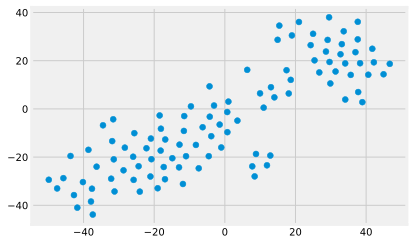

In [31]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

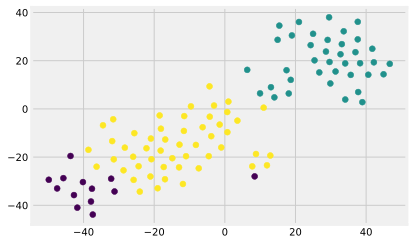

In [35]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [41]:
price_claster_0 = y_train[labels_train == 0].mean()
price_claster_1 = y_train[labels_train == 1].mean()
price_claster_2 = y_train[labels_train == 2].mean()
CRIM_cluster_0 = X_train.loc[labels_train == 0, 'CRIM'].mean()
CRIM_cluster_1 = X_train.loc[labels_train == 1, 'CRIM'].mean()
CRIM_cluster_2 = X_train.loc[labels_train == 2, 'CRIM'].mean()
print('среднее значение цены по кластерам: ', price_claster_0, price_claster_1, price_claster_2)
print('среднее значение CRIM по кластерам: ', CRIM_cluster_0, CRIM_cluster_1, CRIM_cluster_2)

среднее значение цены по кластерам:  34.55384615384616 16.710526315789473 21.71764705882353
среднее значение CRIM по кластерам:  0.08308461538461537 9.419181842105264 0.22250117647058823
